# 팀 데이터 분석 프로젝트

## 목표
> 각 개인별 최적 여행지 추천,

> 각 여행지별 라벨 부여 후, 모든 여행지 태그를 통합하여, 태그별 라벨 분류해서 여행지 분류

혹은 각 여행지별 여행자의 유사도 판단하는 건
각각의 태그 정보를 보고 유저 유사도 분류하기


1. 여행지별 라벨 부여 -> 여행지 통합 후 태그별 여행지 라벨 분류
2. 여행자의 태그를 토큰화 하고, 각각의 태그에 따라 여행자를 분류 및 여행자 별 유사도 판단 -> 이후에 각각의 여행지별 태그의 유사도 및 상관관계가 있다고 판단되면 다른 여행지를 추천 할 수 있지 않을까?



In [7]:
!pip install ktrain

In [2]:
!pip install torch==1.7.0
!pip install mxnet==1.4.0
!pip install gluonnlp==0.6.0
!pip install sentencepiece==0.1.6
!pip install onnxruntime==0.3.0
!pip install transformers 

ERROR: Could not find a version that satisfies the requirement torch==1.7.0 (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2, 1.7.1, 1.8.0, 1.8.1, 1.9.0)
ERROR: No matching distribution found for torch==1.7.0


  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
    Running setup.py install for numpy: started
    Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\anaconda\lib\site-packages\numpy-1.19.5.dist-info\
   from C:\anaconda\Lib\site-packages\~umpy-1.19.5.dist-info
  Moving to c:\

  ERROR: Command errored out with exit status 1:
   command: 'C:\anaconda\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Bonghwan\\AppData\\Local\\Temp\\pip-install-n9pb4jkg\\numpy_3a5cbce53fb44f199171a10fa98329cb\\setup.py'"'"'; __file__='"'"'C:\\Users\\Bonghwan\\AppData\\Local\\Temp\\pip-install-n9pb4jkg\\numpy_3a5cbce53fb44f199171a10fa98329cb\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Bonghwan\AppData\Local\Temp\pip-wheel-zokk7qyv'
       cwd: C:\Users\Bonghwan\AppData\Local\Temp\pip-install-n9pb4jkg\numpy_3a5cbce53fb44f199171a10fa98329cb\
  Complete output (288 lines):
  Running from numpy source directory.
  C:\Users\Bonghwan\AppData\Local\Temp\pip-install-n9pb4jkg\numpy_3a5cbce53fb44f1

  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259922 sha256=063dbcdc20e01acbd37170d1d4ee93b7b72aa8935853b22fcd54502fd2f4f77a
  Stored in directory: c:\users\bonghwan\appdata\local\pip\cache\wheels\75\d0\a1\57ea55532e4ff6e3efbec7a851724a8f7a5b073ff648dd4160
Successfully built gluonnlp


ERROR: Could not find a version that satisfies the requirement sentencepiece==0.1.6 (from versions: 0.0.0, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.9, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.83, 0.1.85, 0.1.86, 0.1.90, 0.1.91, 0.1.92, 0.1.94, 0.1.95, 0.1.96)
ERROR: No matching distribution found for sentencepiece==0.1.6
ERROR: Could not find a version that satisfies the requirement onnxruntime==0.3.0 (from versions: 1.2.0, 1.3.0, 1.4.0, 1.5.1, 1.5.2, 1.6.0, 1.7.0, 1.8.0, 1.8.1)
ERROR: No matching distribution found for onnxruntime==0.3.0


In [3]:
!pip install konlpy

  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
html-table-parser 0.1.0 requires beautifulsoup4==4.4.1, but you have beautifulsoup4 4.6.0 which is incompatible.


In [8]:
import pandas as pd

from konlpy.tag import Okt, Kkma
import numpy as np
import re
from collections import Counter
import unicodedata # 인스타 자/모음 분리현상 제거하기 위한 라이브러리
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

import re
from tqdm import tqdm

In [10]:
import plaidml.keras
import os

plaidml.keras.install_backend ()
os.environ ['KERAS_BACKEND'] ='plaidml.keras.backend'

AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'

## 1. 여행지 별 라벨 -> 여행지 별 분류

### 데이터 정제

In [11]:
path = 'C:/Users/Bonghwan/Downloads/'


In [12]:
df = pd.read_csv(path+'total.csv')
df

,Unnamed: 0,tag,travel,matjip,region
0,0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya
1,1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya
2,2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya
3,3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya
4,4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya
...,...,...,...,...,...
425991,5774,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok
425992,5775,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok
425993,5776,[''],1,0,vladivostok
425994,5777,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok


### 불용어 처리 안함

In [13]:
df['tag'][0]

"['#존맛탱', '#맛있다그램', '#좋아요', '#맛있다', '#좋반', '#좋반테러', '#아유타야', '#좋아요그램', '#아유타야맛집', '#핫플레이스', '#태국음식점', '#존맛', '#씨푸드', '#씨푸드맛집', '#좋아요반사', '#태국음식', '#jmt', '#좋아', '#좋아요테러', '#핫플', '#태국음식맛집', '#맛있어', '#태국', '#태국맛집', '#태국요리']"

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,tag,travel,matjip,region
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya
...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok
425993,[''],1,0,vladivostok
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok


In [15]:
# re.sub(pattern=r'[^A-Za-z가-힣]', string = )
df['reg']=df['tag'].apply(lambda x: re.sub(pattern=r'[^A-Za-z가-힣]', string = x, repl=' '))
df

,tag,travel,matjip,region,reg
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...
...,...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...
425993,[''],1,0,vladivostok,
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...


In [16]:
df['reg']
def make_sent(sent):
  chan = sent.split(sep='#')
  return chan

df['sep']=df['tag'].apply(lambda x: make_sent(x))

In [17]:
df.sep[0][0][0]
# df['mor']=df['sep'].str.replace(pat=r'[^A-Za-z가-힣]', repl=r' ', regex=True)
# madrid['tag']= madrid['tag'].str.replace(pat=r'[^A-Za-z가-힣0-9]', repl=r' ', regex=True)
# apply(lambda x: re.sub(pattern=r'[^A-Za-z가-힣]', string = x, repl=' '))
type(df.sep[0])

list

In [18]:
# def make_regex(sent):
#   word_list = []
#   for i in sent:
#     word = re.sub(pattern=r'[#!?[]]', string = i, repl=' ')
#     if word != ' ':
#       word_list.append(word)
#   return word_list
# df['mor'] = df['sep'].apply(lambda x: make_regex(x))

In [19]:
df

,tag,travel,matjip,region,reg,sep,mor
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",NaN
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",NaN
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",NaN
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",NaN
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",NaN
...,...,...,...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",NaN
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",NaN
425993,[''],1,0,vladivostok,,[['']],NaN
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",NaN


In [20]:
print(df.region.unique())
# spain = ['madrid', 'barca', 'toledo', '']

['ayutaya' 'bangkok' 'barca' 'beijing' 'canton' 'chiang' 'chingdao'
 'chingdao_rev' 'colmar' 'danang' 'edinburgh' 'firenze' 'granada' 'hanoi'
 'havarop' 'hawai' 'hochiminh' 'hoian' 'hukuoka' 'irkutsk' 'kyoto' 'la'
 'lasvegas' 'liverpool' 'london' 'lyon' 'madrid' 'manchester' 'marseille'
 'milano' 'moscow' 'newyork' 'nhatrang' 'nice' 'osaka' 'oxford' 'paris'
 'pattaya' 'phuket' 'positano' 'rome' 'saintpete' 'sanghai' 'sapporo'
 'seattle' 'sevilla' 'strasbourg' 'tokyo' 'toled' 'toledo' 'venezia'
 'versaille' 'vladivostok' 'xian' 'xian_eng' 'Irkutsk' 'saintpetersburg']


In [21]:
for i in df.region:
  if '3' in i:
    i = i[:-1]
df['region'] = df['region'].apply(lambda x : x[:-1] if '3' in x else x)
df

,tag,travel,matjip,region,reg,sep,mor
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",NaN
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",NaN
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",NaN
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",NaN
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",NaN
...,...,...,...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",NaN
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",NaN
425993,[''],1,0,vladivostok,,[['']],NaN
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",NaN


In [22]:
df['region'] = df['region'].apply(lambda x: 'chingdao' if x =='chingdao_rev' else x)
df['region'] = df['region'].apply(lambda x: 'xian' if x =='xian_eng' else x)
df['region'] = df['region'].apply(lambda x: 'irkutsk' if x =='Irkutsk' else x)
df['region'] = df['region'].apply(lambda x: 'saintpetersburg' if x =='saintpete' else x)
df['region'] = df['region'].apply(lambda x: 'toledo' if x =='toled' else x)

In [23]:
print(df.region.unique())
print(len(df.region.unique()))
def make_country(sent):
  tai = ['ayutaya', 'bangkok', 'chiang', 'phuket', 'pattaya']
  china = ['beijing', 'canton', 'chingdao', 'sanghai', 'xian']
  vietnam = ['hanoi', 'hochiminh', 'hoian', 'danang', 'nhatrang']
  england = ['london', 'oxford', 'manchester', 'liverpool', 'edinburgh']
  spain = ['barca',  'granada','toledo' ,'sevilla', 'madrid']
  us = ['lasvegas', 'hawai', 'seattle', 'newyork', 'la']
  japan =['tokyo', 'kyoto', 'hukuoka', 'osaka', 'sapporo']
  rusia = ['havarop', 'saintpetersburg', 'vladivostok', 'moscow', 'irkutsk']
  france = ['colmar', 'paris', 'marseille', 'versaille', 'strasbourg', 'lyon', 'nice']
  italia = ['firenze', 'milano', 'rome', 'venezia', 'positano']
  if sent in tai:
    country = 'tai'
  elif sent in china:
    country = 'china'
  elif sent in vietnam:
    country = 'vietnam'
  elif sent in england:
    country = 'england'
  elif sent in spain:
    country = 'spain'
  elif sent in us:
    country = 'us'
  elif sent in japan:
    country = 'japan'
  elif sent in rusia:
    country = 'rusia'
  elif sent in france:
    country = 'france'
  elif sent in italia:
    country = 'italia'
  
  return country

df['country'] = df['region'].apply(lambda x: make_country(x))

['ayutaya' 'bangkok' 'barca' 'beijing' 'canton' 'chiang' 'chingdao'
 'colmar' 'danang' 'edinburgh' 'firenze' 'granada' 'hanoi' 'havarop'
 'hawai' 'hochiminh' 'hoian' 'hukuoka' 'irkutsk' 'kyoto' 'la' 'lasvegas'
 'liverpool' 'london' 'lyon' 'madrid' 'manchester' 'marseille' 'milano'
 'moscow' 'newyork' 'nhatrang' 'nice' 'osaka' 'oxford' 'paris' 'pattaya'
 'phuket' 'positano' 'rome' 'saintpetersburg' 'sanghai' 'sapporo'
 'seattle' 'sevilla' 'strasbourg' 'tokyo' 'toledo' 'venezia' 'versaille'
 'vladivostok' 'xian']
52


In [24]:
df

,tag,travel,matjip,region,reg,sep,mor,country
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",NaN,tai
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",NaN,tai
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",NaN,tai
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",NaN,tai
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",NaN,tai
...,...,...,...,...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",NaN,rusia
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",NaN,rusia
425993,[''],1,0,vladivostok,,[['']],NaN,rusia
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",NaN,rusia


### 빈 리스트 제거(결측치)

In [25]:
df = df.query('tag != "[]" ')
df

,tag,travel,matjip,region,reg,sep,mor,country
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",NaN,tai
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",NaN,tai
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",NaN,tai
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",NaN,tai
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",NaN,tai
...,...,...,...,...,...,...,...,...
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",NaN,rusia
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",NaN,rusia
425993,[''],1,0,vladivostok,,[['']],NaN,rusia
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",NaN,rusia


In [26]:
df = df[df['tag'] !="['']"]

In [27]:
df

,tag,travel,matjip,region,reg,sep,mor,country
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",NaN,tai
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",NaN,tai
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",NaN,tai
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",NaN,tai
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",NaN,tai
...,...,...,...,...,...,...,...,...
425990,"[""'#킹크랩'"", "" '#블라디보스토크카페'"", "" '#블라디보스토크레스토랑'"",...",1,0,vladivostok,킹크랩 블라디보스토크카페 블라디보스토크레스토랑 ...,"[[""', 킹크랩'"", "" ', 블라디보스토크카페'"", "" ', 블라디보스토크레스토...",NaN,rusia
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",NaN,rusia
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",NaN,rusia
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",NaN,rusia


In [28]:
df.country.nunique()

10

In [29]:
print(df.shape)
print(len(df.tag))
print(len(df.tag.max()))

(399741, 8)
399741
18


In [32]:
# for c,i in enumerate(df['reg']):
#   if '캘리포니아여행' in i :
#     print('여기')
#     print(c)
#     break;
df.iloc[71415:388624]

### 나중에 다시 la와 lasvegas 구분할 필요가 있ㅇㅁ

여기
71415


,tag,travel,matjip,region,reg,sep,mor,country
74848,"['#healthyfoods', '#엘에이맛집', '#COVID19', '#LA맛집...",0,1,la,healthyfoods 엘에이맛집 COVID LA맛집...,"[[', healthyfoods', ', 엘에이맛집', ', COVID19', ',...",NaN,us
74849,"['#healthyfoods', '#엘에이맛집', '#COVID19', '#LA맛집...",0,1,la,healthyfoods 엘에이맛집 COVID LA맛집...,"[[', healthyfoods', ', 엘에이맛집', ', COVID19', ',...",NaN,us
74850,"['#엘에이맛집', '#엘에이라이프', '#글렌데일', '#엘에이카페', '#엘에이...",0,1,la,엘에이맛집 엘에이라이프 글렌데일 엘에이카페 엘에이...,"[[', 엘에이맛집', ', 엘에이라이프', ', 글렌데일', ', 엘에이카페', ...",NaN,us
74851,"['#instamacarons', '#엘에이디저트', '#엘에이맛집', '#oc맛집...",0,1,la,instamacarons 엘에이디저트 엘에이맛집 oc맛집...,"[[', instamacarons', ', 엘에이디저트', ', 엘에이맛집', ',...",NaN,us
74852,"['#코리아타운', '#LA맛집', '#스톤네일', '#ktownla', '#시럽네...",0,1,la,코리아타운 LA맛집 스톤네일 ktownla 시럽네...,"[[', 코리아타운', ', LA맛집', ', 스톤네일', ', ktownla', ...",NaN,us
...,...,...,...,...,...,...,...,...
413607,['#마르코투어부서지는'],1,0,venezia,마르코투어부서지는,"[[', 마르코투어부서지는']]",NaN,italia
413608,"['#베네치아', '#유럽여행준비', '#이탈리아가이드', '#베니스', '#트립인...",1,0,venezia,베네치아 유럽여행준비 이탈리아가이드 베니스 트립인...,"[[', 베네치아', ', 유럽여행준비', ', 이탈리아가이드', ', 베니스', ...",NaN,italia
413609,"['#venice', '#italy', '#🇮🇹']",1,0,venezia,venice italy,"[[', venice', ', italy', ', 🇮🇹']]",NaN,italia
413610,"['#❤️해질녘', '#daily', '#이탈리아', '#instagood', '#...",1,0,venezia,해질녘 daily 이탈리아 instagood ...,"[[', ❤️해질녘', ', daily', ', 이탈리아', ', instagood...",NaN,italia


In [33]:
df.drop('mor', inplace=True, axis=1)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df

,tag,travel,matjip,region,reg,sep,country
0,"['#존맛탱', '#맛있다그램', '#좋아요', '...",0,1,ayutaya,...,"[[', 존맛탱', ', 맛있다그램', ', 좋아요...",tai
1,"['#enfoodgallery', '#enfoodgalleryxayutthaya——...",0,1,ayutaya,enfoodgallery enfoodgalleryxayutthaya ...,"[[', enfoodgallery', ', enfoodgalleryxayutthay...",tai
2,"['#ayuttaya', '#thainoodle', '#먹방여행', '#snap',...",0,1,ayutaya,ayuttaya thainoodle 먹방여행 snap ...,"[[', ayuttaya', ', thainoodle', ', 먹방여행', ', s...",tai
3,"['#instagood', '#태국', '#likeforlikes', '#banma...",0,1,ayutaya,instagood 태국 likeforlikes banma...,"[[', instagood', ', 태국', ', likeforlikes', ', ...",tai
4,"['#아유타야맛집', '#likeforlikeback', '#왓프라마하탓', '#l...",0,1,ayutaya,아유타야맛집 likeforlikeback 왓프라마하탓 l...,"[[', 아유타야맛집', ', likeforlikeback', ', 왓프라마하탓',...",tai
...,...,...,...,...,...,...,...
425990,"[""'#킹크랩'"", "" '#블라디보스토크카페'"", "" '#블라디보스토크레스토랑'"",...",1,0,vladivostok,킹크랩 블라디보스토크카페 블라디보스토크레스토랑 ...,"[[""', 킹크랩'"", "" ', 블라디보스토크카페'"", "" ', 블라디보스토크레스토...",rusia
425991,"[""'#daily'"", "" '#여행스타그램'"", "" '#vladivostok'"", ...",1,0,vladivostok,daily 여행스타그램 vladivostok ...,"[[""', daily'"", "" ', 여행스타그램'"", "" ', vladivostok...",rusia
425992,"[""'#러시아어'"", "" '#여행은옳다'"", "" '#블라디보스톡'"", "" '#러시아...",1,0,vladivostok,러시아어 여행은옳다 블라디보스톡 러시아...,"[[""', 러시아어'"", "" ', 여행은옳다'"", "" ', 블라디보스톡'"", "" '...",rusia
425994,"[""'#ппвладивосток'"", "" '#dontpanicitsorganic'""...",1,0,vladivostok,dontpanicitsorganic ...,"[[""', ппвладивосток'"", "" ', dontpanicitsorgani...",rusia


###  인스타그램의 해쉬태그는 그 자체로의 의미를 지닌다고 생각하여, 불용어 제거 및 토크나이징을 따로 하지 않음
**데이터 전처리( 정규표현식을 사용하여 특수문자만 제거) 각 현지언어도 포함되어 있기 때문에, 특수문자만을 제거해야함**


-> 바로 임베딩 후 데이터 분석

In [ ]:
# type(df.mor[0])

### region 과 country 로 분류
- 국가별
- 도시별
컬럼별로 추가하고, tag 를 nlp를 이용해서 분류 일단 국가별 예상하고, 그 다음에 도시별 예측하면 되지 않을까?

---
일단  training과 test 셋으로 분리한 후에, 확인 해보면 되겠다.

그리고 여행 태그인지 맛집 태그인지도 분류할 수 있겠다!


# 1. ALBERT 를 사용 (multi category) - 도시(지역) 혹은 국가별 분류
- 유저별 분류할 수 있는 고유 값이 있다면 유저별로 분류해도 괜찮았을 텐데
-> 유저 아이디 값을 가져오지 않은 것이 아쉬움
-> 그렇게 될 경우 유저별 분류 및 앞으로 그 유저의 추천 알고리즘 구현까지 가능할 것으로 생각



In [35]:
import ktrain
from ktrain import text

In [36]:
NUM_WORDS = 50000
MAX_LEN = 50

trn, val, preproc = text.texts_from_df(df,
                                        'tag',
                                        label_columns =['country'],
                                        
                                        max_features = NUM_WORDS, 
                                      maxlen = MAX_LEN,
                                      ngram_range = 1)


['china', 'england', 'france', 'italia', 'japan', 'rusia', 'spain', 'tai', 'us', 'vietnam']
        china  england  france  italia  japan  rusia  spain  tai   us  vietnam
220364    0.0      0.0     0.0     0.0    0.0    0.0    0.0  0.0  0.0      1.0
371844    0.0      0.0     0.0     1.0    0.0    0.0    0.0  0.0  0.0      0.0
405591    0.0      0.0     0.0     0.0    1.0    0.0    0.0  0.0  0.0      0.0
51522     0.0      0.0     0.0     0.0    0.0    0.0    0.0  0.0  0.0      1.0
69943     0.0      0.0     0.0     0.0    1.0    0.0    0.0  0.0  0.0      0.0
['china', 'england', 'france', 'italia', 'japan', 'rusia', 'spain', 'tai', 'us', 'vietnam']
        china  england  france  italia  japan  rusia  spain  tai   us  vietnam
299003    0.0      0.0     1.0     0.0    0.0    0.0    0.0  0.0  0.0      0.0
332533    0.0      0.0     0.0     0.0    0.0    0.0    0.0  0.0  0.0      1.0
202161    0.0      0.0     0.0     0.0    0.0    0.0    1.0  0.0  0.0      0.0
215596    1.0      0.0    

In [37]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [38]:
model = text.text_classifier('fasttext', trn, preproc=preproc)
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

Is Multi-Label? False
compiling word ID features...
maxlen is 50
done.


In [40]:
learner.lr_find(max_epochs=5)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
11243/11243 [==============================] - 235s 21ms/step - loss: 2.8485 - accuracy: 0.1026
Epoch 2/5
11243/11243 [==============================] - 234s 21ms/step - loss: 1.9291 - accuracy: 0.3495
Epoch 3/5
11243/11243 [==============================] - 235s 21ms/step - loss: 0.2362 - accuracy: 0.9293
Epoch 4/5
11243/11243 [==============================] - 235s 21ms/step - loss: 1.2018 - accuracy: 0.5938


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


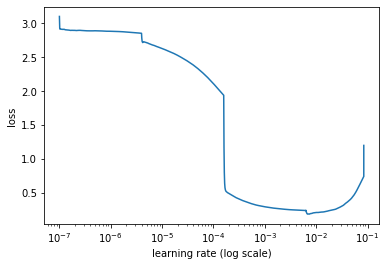

In [41]:
learner.lr_plot()

In [42]:
learner.autofit(0.002, 15)



begin training using triangular learning rate policy with max lr of 0.002...
Epoch 1/15
11243/11243 [==============================] - 237s 21ms/step - loss: 0.3494 - accuracy: 0.8887 - val_loss: 0.0805 - val_accuracy: 0.9732
Epoch 2/15
11243/11243 [==============================] - 237s 21ms/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0734 - val_accuracy: 0.9756
Epoch 3/15
11243/11243 [==============================] - 235s 21ms/step - loss: 0.0919 - accuracy: 0.9716 - val_loss: 0.0694 - val_accuracy: 0.9768
Epoch 4/15
11243/11243 [==============================] - 233s 21ms/step - loss: 0.0854 - accuracy: 0.9734 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 5/15
11243/11243 [==============================] - 237s 21ms/step - loss: 0.0817 - accuracy: 0.9743 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 6/15
11243/11243 [==============================] - 235s 21ms/step - loss: 0.0779 - accuracy: 0.9756 - val_loss: 0.0651 - val_accuracy: 0.9782
Epoch 7/15
11243/11243 [===

### 데이터 나누기(train/test)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(df['tag']), np.array(df['country']), test_size=0.2, random_state=42)

In [45]:
type(y_test[0])
x_tr = x_train.tolist()
y_tr = y_train.tolist()
x_ts = x_test.tolist()
y_ts = y_test.tolist()

In [53]:
x_test

array(["['#봉막쉐', '#일상', '#따뜻한겨울', '#인테리어', '#interior', '#inspiration', '#퀴진', '#kitchendesign', '#lebonmarche', '#사진', '#maman', '#cuisine', '#콘란샵', '#디자인', '#파리', '#saison', '#paris', '#봉마르쉐', '#파리일상', '#여행기록', '#파리여행', '#nyc', '#데일리', '#행복한사진', '#lamaison', '#parisianvibes', '#여행사진']",
       '["\'#제주도아님\'", " \'#라이카\'", " \'#러시아여행\'", " \'#블라디보스톡\'", " \'#블라디보스톡여행\'", " \'#라이카디룩스\'", " \'#무보정\'", " \'#루스키섬\'", " \'#블라디보스토크여행\'", " \'#러시아\'", " \'#블라디보스토크\'"]',
       "['#온천', '#후쿠오카여행', '#大丸別荘', '#아마노타카코', '#あまちゃん旅日記', '#아나운서', '#후츠카이치온천', '#司会者', '#gotoキャンペーン', '#二日市温泉', '#아마노타카코아나운서', '#天野貴子', '#福岡温泉', '#アナウンサー', '#福岡フリーアナウンサー', '#福岡旅行', '#二日市温泉大丸別荘', '#マイクロツーリズム', '#사회자']",
       ...,
       "['#유기견해외입양', '#뉴욕여행', '#벤쿠버여행.', '#미국출장', '#해외입양이동봉사', '#유기견', '#벤쿠버출국', '#시애틀여행', '#아시아나항공', '#여행준비', '#koreanair', '#인천공항', '#시애틀', '#이동봉사후기', '#대한항공', '#이동봉사', '#공유는아이들에게큰도움이됩니다❤', '#해외입양', '#공항', '#유기견입양', '#토론토여행']",
       '["\'#天王寺\'", 

In [46]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [56]:
y_pred = predictor.predict(x_test)

In [55]:
df = pd.DataFrame()

# df['pred'] = x_test['tag'].apply(lambda x : predictor.predict(x))
df['pred']= predictor.predict(x_test)

In [63]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(y_test)
y_enc = enc.transform(y_test)
y_enc
enc.fit(y_pred)
y_pred_enc = enc.transform(y_pred)
y_pred_enc

array([2, 5, 4, ..., 8, 4, 9], dtype=int64)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MSE :",mean_squared_error(y_enc, y_pred_enc))
print("MAE :",mean_absolute_error(y_enc, y_pred_enc))

MSE : 0.35044841086192446
MAE : 0.06749302680458792


# 2. AutoML 사용 - 여행/맛집 분류 (binary)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.transformers import *

clf = setup(df, 'travel', )